# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

# Import required packages

In [193]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.utils import shuffle
import itertools
import pandas as pd
from textwrap import wrap
import csv
import random
import math
import os
import cv2

---
## Step 0: Load The Data

In [2]:
# Load pickled data

training_file = "./traffic-signs-data/train.p"
validation_file="./traffic-signs-data/valid.p"
testing_file = "./traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_valid = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(list(set(y_train.tolist())))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_valid)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Additional Tests

Check for classes in test and validation sets that are not in the training set.

In [4]:
test_labels = set(y_test.tolist()) 
valid_labels = set(y_valid.tolist()) 
train_labels = set(y_train.tolist())                          
                          
print("Labels in test set that are not in training set: ", len(list(test_labels.difference(train_labels))))
print("Labels in validation set that are not in training set: ", len(list(valid_labels.difference(train_labels))))

Labels in test set that are not in training set:  0
Labels in validation set that are not in training set:  0


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [127]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

sign_classes = pd.read_csv("signnames.csv")['SignName'].tolist()

# Look at the number of images for each sign
label_train, count_train = np.unique(y_train, return_counts=True)

print("Maximum number of images per label in training set: ", max(count_train))
print("Minimum number of images per label in training set: ", min(count_train))
print("Average number of images per label in training set: ", sum(count_train)/len(count_train))


Maximum number of images per label in training set:  2010
Minimum number of images per label in training set:  180
Average number of images per label in training set:  809.2790697674419


In [128]:
# Look at the number of images for each sign
label_valid, count_valid = np.unique(y_valid, return_counts=True)

print("Maximum number of images per label in validation set: ", max(count_valid))
print("Minimum number of images per label in validation set: ", min(count_valid))
print("Average number of images per label in validation set: ", sum(count_valid)/len(count_valid))

Maximum number of images per label in validation set:  240
Minimum number of images per label in validation set:  30
Average number of images per label in validation set:  102.55813953488372


In [129]:
# Look at the number of images for each sign
label_test, count_test = np.unique(y_test, return_counts=True)

print("Maximum number of images per label in validation set: ", max(count_test))
print("Minimum number of images per label in validation set: ", min(count_test))
print("Average number of images per label in validation set: ", sum(count_test)/len(count_test))

Maximum number of images per label in validation set:  750
Minimum number of images per label in validation set:  60
Average number of images per label in validation set:  293.72093023255815


In [143]:
def simple_barchart(x_labels, values, chart_title, y_title, series_labels=[]):
    
    x = np.arange(len(x_labels))
    
    fig=plt.figure(figsize=(18, 8), dpi= 80)
    
    n_series = len(series_labels)
    
    if n_series > 1:
        assert n_series == len(values), "Supplied data series must have corresponding labels."
        
        width = 0.8 / n_series
        for i,series_label in enumerate(series_labels):
            plt.bar(x + (width*(i)), values[i][:], width, alpha=0.5, label = series_label)
            
        plt.xticks(x + width / n_series, x_labels, rotation=45, ha="right")
        plt.legend(loc='best')
    else:
        plt.bar(x, values, align='center', alpha=0.5)
        plt.xticks(x, labels, rotation=45, ha="right")

    plt.ylabel(y_title)
    plt.title(chart_title)

    plt.show()


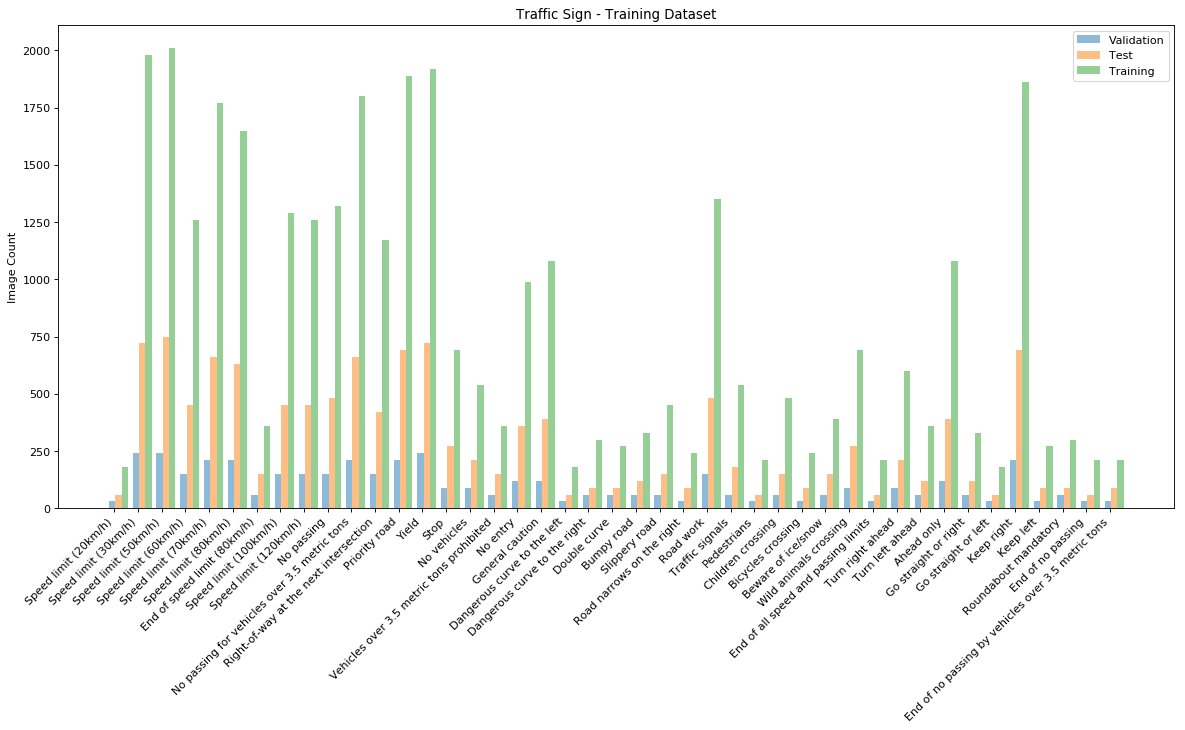

In [144]:
counts = [count_valid, count_test, count_train]
series_labels = ['Validation', 'Test', 'Training']

simple_barchart(sign_classes, counts, 'Traffic Sign - Training Dataset', 'Image Count', series_labels)

The data available for each respective category appears to be quite imbalanced. Where some labels contain up to 10x more images than the other labels.

The test and validation sets also have similar imbalances, which indicates that the data was subdivided evenly.

In [252]:
# Plot images for all labels
def plot_image(image, label=None):
    # Plots images and accounds for greyscale and whether the images were normalised.
    if abs(np.mean(image)) < 0.25:
        image = (image + 1)/2
        
    if image.shape[2] < 3:
        image = image[:,:,0]
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(image)
        
    if not label==None:
        plt.title("\n".join(wrap(label, 15)))
        
    plt.axis('off')
        
def set_up_plot_area(n_images, n_cols=10):
    n_rows = math.ceil(n_images/n_cols)
    fig=plt.figure(figsize=(n_cols * 2, n_rows*2), dpi= 80)
    return n_rows, n_cols

def print_image_sample(image_set):
    n_images = 12
    n_rows, n_cols = set_up_plot_area(n_images, n_cols=4)

    for i in range(1,n_images + 1):
        plt.subplot(n_rows, n_cols, i)
        index = random.randint(0, len(image_set)-1)
        plot_image(image_set[index])
        
    plt.show()
    
def print_images(image_set, labels=None):
    n_images = len(image_set)
    n_rows, n_cols = set_up_plot_area(n_images)

    for i in range(n_images):
        plt.subplot(n_rows, n_cols, i+1)
        if labels != None:
            assert len(labels) == n_images, 'Number of labels must match number of images.'
            plot_image(image_set[i], labels[i])
        else:
            plot_image(image_set[i])

    plt.show()
    
def print_image_sample_compare(image_set1, image_set2):
    n_images = 18
    n_rows, n_cols = set_up_plot_area(n_images, n_cols = 6)

    for i in range(1,int(n_rows*n_cols/2) + 1):
        index = random.randint(0, len(image_set1)-1)
        
        plt.subplot(n_rows, n_cols, i*2-1)
        plot_image(image_set1[index])
        
        plt.subplot(n_rows, n_cols, i*2)
        plot_image(image_set2[index])

    plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

### Normalise the image data

In [153]:
COLOR_CHANNELS = 1

In [154]:
tf_processed_train = tf.map_fn(lambda x: tf.image.per_image_standardization(x), X_train, dtype=tf.float32, parallel_iterations=2000)
tf_processed_valid = tf.map_fn(lambda x: tf.image.per_image_standardization(x), X_valid, dtype=tf.float32, parallel_iterations=2000)
tf_processed_test = tf.map_fn(lambda x: tf.image.per_image_standardization(x), X_test, dtype=tf.float32, parallel_iterations=2000)

if COLOR_CHANNELS is 1:
    tf_processed_train = tf.image.rgb_to_grayscale(tf_processed_train)
    tf_processed_valid = tf.image.rgb_to_grayscale(tf_processed_valid)
    tf_processed_test = tf.image.rgb_to_grayscale(tf_processed_test)

In [155]:
with tf.Session() as sess:
    processed_train = tf_processed_train.eval()
    processed_valid = tf_processed_valid.eval()
    processed_test = tf_processed_test.eval()

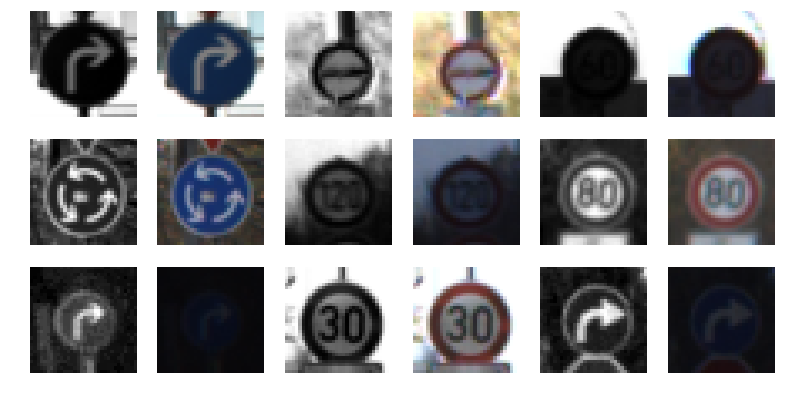

In [249]:
print_image_sample_compare(processed_train, X_train)

In [157]:
processed_valid.shape

(4410, 32, 32, 1)

### Duplicate Images in Categories with less features
Augment test data so that there are roughly an equal amount of images per class in the training set.

In [158]:
def augment_image_data(images_in, examples_required):
    
    image_list = np.array(images_in)
   
    # function augments images randomly and evenly so that number of examples is matched.
    augmented_image_list = np.copy(image_list)
    augmentations = examples_required/len(image_list)
    full_augmentations = math.ceil(augmentations) - 1
    
    print('Augmenting', len(image_list), 'images.')

    if augmentations >= 10:
        print('Warning original data will be increased by more that', full_augmentations,'x!')
        
    def stretch_images(image_set):
        max_stretch = 1.5

        def get_random_resize_box(max_stretch):
            y1 = random.uniform(0, 1/(2*max_stretch))
            y2 = 1 - random.uniform(0, 1/(2*max_stretch))
            x1 = random.uniform(0, 1/(2*max_stretch))
            x2 = 1 - random.uniform(0, 1/(2*max_stretch))
            return [y1, x1, y2, x2]

        resize_boxes = [get_random_resize_box(max_stretch) for image in image_set]
        box_allocation = np.array(range(len(image_set)))
        
        with tf.Session() as sess:
            augmented = tf.image.crop_and_resize(image_set, resize_boxes, box_allocation, [32, 32]).eval()
            sess.close()
        return augmented

    def blur_images(image_set):
        # resize, then resize back

        blur_min = 1.2
        blur_max = 1.8

        assert len(image_set[0][0]) == len(image_set[0][1]), "Image must be square!"
        original_res = len(image_set[0][0])

        def get_blur_resolution(blur_min, blur_max):
            blur_resolution = round(original_res * 1/random.uniform(blur_min, blur_max))
            return [blur_resolution, blur_resolution]

        with tf.Session() as sess:
            small_images = tf.image.resize_images(image_set, get_blur_resolution(blur_min, blur_max))
            augmented = tf.image.resize_images(small_images, [original_res, original_res]).eval()
            sess.close()
        return augmented
    
    def rotate_images(image_set):
        max_angle = 0.4 # Defined in radians (0.4 corresponds to ~23deg)
        
        def get_random_angle(max_angle):
            return random.uniform(-max_angle, max_angle)

        random_angles = [get_random_angle(max_angle) for image in image_set]
        
        with tf.Session() as sess:
            augmented = tf.contrib.image.rotate(image_set,random_angles, interpolation='BILINEAR').eval()
            sess.close();
        return augmented

    def contrast_images(image_set):
        with tf.Session() as sess:
            augmented = tf.map_fn(lambda image: tf.image.random_contrast(image,0.5,2), image_set, dtype=tf.float32, parallel_iterations=1000).eval()
            sess.close()
        return augmented

    augmentation_functions = [stretch_images, contrast_images, blur_images, rotate_images] #shear_images, noise_images]

    if augmentations >= 1:

        for i in range(full_augmentations):
            function_index = i%len(augmentation_functions)
            augmented_image_list = np.append(augmented_image_list, augmentation_functions[function_index](image_list), axis=0)

        remaining_augmentations = examples_required%len(image_list)

        if remaining_augmentations > 0:
            remaining_images = shuffle(image_list)[:remaining_augmentations]
            augmented_image_list = np.append(augmented_image_list, random.choice(augmentation_functions)(remaining_images), axis=0)
    else:
        print('Original data set contains more items than required, not augmenting.')
        
    return shuffle(augmented_image_list)


In [159]:
image_sets = []

for i in range(n_classes):
    filtered_by_class = [ image for index,image in enumerate(processed_train) if y_train[index] == i ]
    image_sets.append(filtered_by_class)

# augment dataset
augmented_image_sets = [augment_image_data(image_set, 1000) for image_set in image_sets]

# flatten the list back into original training set format
augmented_training_set = [image for image_set in augmented_image_sets for image in image_set]
augmented_training_labels = [index for index,image_set in enumerate(augmented_image_sets) for image in image_set]

Augmenting 180 images.
Augmenting 1980 images.
Original data set contains more items than required, not augmenting.
Augmenting 2010 images.
Original data set contains more items than required, not augmenting.
Augmenting 1260 images.
Original data set contains more items than required, not augmenting.
Augmenting 1770 images.
Original data set contains more items than required, not augmenting.
Augmenting 1650 images.
Original data set contains more items than required, not augmenting.
Augmenting 360 images.
Augmenting 1290 images.
Original data set contains more items than required, not augmenting.
Augmenting 1260 images.
Original data set contains more items than required, not augmenting.
Augmenting 1320 images.
Original data set contains more items than required, not augmenting.
Augmenting 1800 images.
Original data set contains more items than required, not augmenting.
Augmenting 1170 images.
Original data set contains more items than required, not augmenting.
Augmenting 1890 images.


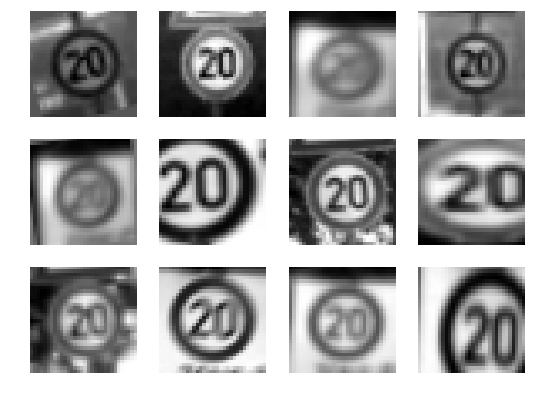

In [264]:
print_image_sample(augmented_image_sets[0])

In [265]:
print('The augmented data set now has a size of',len(augmented_training_set),'compared to',len(X_train),'for the original training data set.')

The augmented data set now has a size of 61799 compared to 34799 for the original training data set.


### Model Architecture

In [160]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
def model(x, COLOR_CHANNELS=1, dropout_keep=1.0):
        
        filters_layer_1 = 16
        filters_layer_2 = 32
        neurons_layer_3 = 240
        neurons_layer_4 = 84
        
        mu = 0.0
        sigma = 0.05
        
        # Layer 1 (Convoluted with activation, dropout and pooling)
        W_lyr_1 = tf.Variable(tf.truncated_normal(shape=(5, 5, COLOR_CHANNELS, filters_layer_1), mean = mu, stddev = sigma))
        b_lyr_1 = tf.Variable(tf.zeros(filters_layer_1))
        
        layer_1 = tf.nn.conv2d(x, W_lyr_1, strides=[1, 1, 1, 1], padding='VALID')
        layer_1 = tf.nn.bias_add(layer_1, b_lyr_1)
        layer_1 = tf.nn.relu(layer_1)
        layer_1 = tf.nn.max_pool(layer_1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
        
        # Layer 2 (Convoluted with activation, dropout and pooling)
        W_lyr_2 = tf.Variable(tf.truncated_normal(shape=(5, 5, filters_layer_1, filters_layer_2), mean = mu, stddev = sigma))
        b_lyr_2 = tf.Variable(tf.zeros(filters_layer_2))
    
        layer_2 = tf.nn.conv2d(layer_1, W_lyr_2, strides=[1, 1, 1, 1], padding='VALID')
        layer_2 = tf.nn.bias_add(layer_2, b_lyr_2)
        layer_2 = tf.nn.relu(layer_2)
        layer_2 = tf.nn.max_pool(layer_2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
        
        # Flatten convoluted layer
        flat_lyr_2 = tf.contrib.layers.flatten(layer_2)
        
        # Layer 3 (Fully connected with activation and dropout)
        W_lyr_3 = tf.Variable(tf.truncated_normal(shape=(5*5*filters_layer_2, neurons_layer_3), mean = mu, stddev = sigma))
        b_lyr_3 = tf.Variable(tf.zeros(neurons_layer_3))
        layer_3 = tf.nn.bias_add(tf.matmul(flat_lyr_2, W_lyr_3), b_lyr_3)
        layer_3 = tf.nn.relu(layer_3)
        layer_3 = tf.nn.dropout(layer_3, dropout_keep)
        
        #Layer 4: (Fully connected with activation and dropout)
        W_lyr_4 = tf.Variable(tf.truncated_normal(shape=(neurons_layer_3, neurons_layer_4), mean = mu, stddev = sigma))
        b_lyr_4 = tf.Variable(tf.zeros(neurons_layer_4))
        layer_4 = tf.nn.bias_add(tf.matmul(layer_3, W_lyr_4), b_lyr_4)
        layer_4 = tf.nn.relu(layer_4)
        layer_4 = tf.nn.dropout(layer_4, dropout_keep)
        
        #Layer 5: (Fully connected output layer, returns logits)
        W_lyr_5  = tf.Variable(tf.truncated_normal(shape=(neurons_layer_4, n_classes), mean = mu, stddev = sigma))
        b_lyr_5  = tf.Variable(tf.zeros(n_classes))
        out_layer = tf.nn.bias_add(tf.matmul(layer_4, W_lyr_5), b_lyr_5)
        
        return out_layer

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

Build graph and set hyperparameters:

In [268]:
BATCH_SIZE = 128

n_batches = math.ceil(len(X_train)/BATCH_SIZE)
sgdr = True
max_learning_rate = 0.001
warmup_period = n_batches * 20
first_decay_steps = n_batches * 2

x = tf.placeholder(tf.float32, (None, 32, 32, COLOR_CHANNELS))
y = tf.placeholder(tf.int32, (None))
iteration = tf.placeholder(tf.int32, shape=(), name="iteration")
dropout_keep = tf.placeholder(tf.float32, shape=(), name="dropout_keep")

one_hot_y = tf.one_hot(y, n_classes)

if sgdr:
    learn_rate = tf.train.cosine_decay_restarts(max_learning_rate, iteration, first_decay_steps)
else:
    learn_rate = max_learning_rate

prediction = model(x, COLOR_CHANNELS, dropout_keep)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=prediction)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = learn_rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(one_hot_y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()


Run training operation:

In [269]:
EPOCHS = 34

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    curr_iteration = 0
    training_progress = []
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_shuffle, y_shuffle = shuffle(processed_train, y_train) #  augmented_training_set, augmented_training_labels
        
        for offset in range(0, num_examples, BATCH_SIZE):
            if curr_iteration < warmup_period:
                mod_iteration = 0
                dropout_prob = 1.0
            else:
                mod_iteration = curr_iteration - warmup_period
                dropout_prob = 0.5
            
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_shuffle[offset:end], y_shuffle[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, iteration: mod_iteration, dropout_keep: 0.5})
            curr_iteration += 1
            
        validation_accuracy = sess.run(accuracy, feed_dict={x: processed_valid, y: y_valid, dropout_keep: 1.0})
        training_progress.append(validation_accuracy)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    
    csv_progress_fileName = 'TrainingProgress_SGDR-' + str(sgdr) + '_LearningRate-' + str(max_learning_rate) + '_BatchSize-' + str(BATCH_SIZE) + '_ColorChannels-' + str(COLOR_CHANNELS) + ".csv"

    #remember images that were predicted incorrectly to be shown again later with the wrong label/right label
    with open(csv_progress_fileName, 'w') as myfile:
        wr = csv.writer(myfile)
        for epoch_accuracy in training_progress:
            wr.writerow([epoch_accuracy])
    saver.save(sess, './lenet')
    print("Model saved")


Training...

EPOCH 1 ...
Validation Accuracy = 0.821

EPOCH 2 ...
Validation Accuracy = 0.905

EPOCH 3 ...
Validation Accuracy = 0.935

EPOCH 4 ...
Validation Accuracy = 0.963

EPOCH 5 ...
Validation Accuracy = 0.960

EPOCH 6 ...
Validation Accuracy = 0.967

EPOCH 7 ...
Validation Accuracy = 0.963

EPOCH 8 ...
Validation Accuracy = 0.973

EPOCH 9 ...
Validation Accuracy = 0.967

EPOCH 10 ...
Validation Accuracy = 0.965

EPOCH 11 ...
Validation Accuracy = 0.965

EPOCH 12 ...
Validation Accuracy = 0.975

EPOCH 13 ...
Validation Accuracy = 0.965

EPOCH 14 ...
Validation Accuracy = 0.965

EPOCH 15 ...
Validation Accuracy = 0.970

EPOCH 16 ...
Validation Accuracy = 0.970

EPOCH 17 ...
Validation Accuracy = 0.974

EPOCH 18 ...
Validation Accuracy = 0.967

EPOCH 19 ...
Validation Accuracy = 0.969

EPOCH 20 ...
Validation Accuracy = 0.973

EPOCH 21 ...
Validation Accuracy = 0.979

EPOCH 22 ...
Validation Accuracy = 0.979

EPOCH 23 ...
Validation Accuracy = 0.980

EPOCH 24 ...
Validation Accura

In [270]:
def get_prediction(X_data):
    y_pred = sess.run(prediction, feed_dict={x: X_data, dropout_keep: 1.0})
    return tf.nn.softmax(y_pred)

def get_confusion_matrix(y_pred, y_data):
    y_pred_condensed = tf.argmax(y_pred, axis=1)    
    confusion_matrix = tf.confusion_matrix(labels=y_data, predictions=y_pred_condensed)
    return sess.run(confusion_matrix)

def get_prediction_accuracy_per_class(confusion_matrix):
    row_sums = tf.reduce_sum(confusion_matrix,axis=1)
    class_accuracy = [confusion_matrix[index,index]/row_sum for index,row_sum in enumerate(row_sums)]

def get_miscategorised_images(y_pred, X_data, y_data, n_classes):
    incorrect_image_sets = []
    incorrect_predictions = []
    y_pred_converted = tf.argmax(y_pred, 1).eval()
    correct_prediction = tf.equal(y_pred_converted, y_data).eval()

    for i in range(n_classes):
        images_by_class = [image for index,image in enumerate(X_data) if correct_prediction[index] == False and y_data[index] == i]
        corresp_labels = [y_pred_converted[index] for index,image in enumerate(X_data) if correct_prediction[index] == False and y_data[index] == i]
        incorrect_image_sets.append(images_by_class)
        incorrect_predictions.append(corresp_labels)
    
    return incorrect_image_sets, incorrect_predictions

In [272]:
#Run it on the training set.
with tf.Session() as sess:
    saver.restore(sess, './lenet')
    
    test_accuracy = sess.run(accuracy, feed_dict={x: processed_train, y: y_train, dropout_keep: 1.0})
    print("")
    print("-------------------------------")
    print("|  Training Accuracy = {:.3f}  |".format(test_accuracy))
    print("-------------------------------")
    print("")

    y_pred = get_prediction(processed_train)
    confusion_matrix = get_confusion_matrix(y_pred, y_train)
    
    miscategorised_images, matching_predictions = get_miscategorised_images(y_pred, processed_train, y_train, n_classes)

INFO:tensorflow:Restoring parameters from ./lenet

-------------------------------
|  Training Accuracy = 1.000  |
-------------------------------



In [273]:
#Run it on the test set.
with tf.Session() as sess:
    saver.restore(sess, './lenet')
    
    test_accuracy = sess.run(accuracy, feed_dict={x: processed_test, y: y_test, dropout_keep: 1.0})
    print("")
    print("---------------------------")
    print("|  Test Accuracy = {:.3f}  |".format(test_accuracy))
    print("---------------------------")
    print("")

    y_pred = get_prediction(processed_test)
    confusion_matrix = get_confusion_matrix(y_pred, y_test)
    
    miscategorised_images, matching_predictions = get_miscategorised_images(y_pred, processed_test, y_test, n_classes)
             

INFO:tensorflow:Restoring parameters from ./lenet

---------------------------
|  Test Accuracy = 0.962  |
---------------------------



Helper functions for plotting:

In [274]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)
    fig=plt.figure(figsize=(18, 30), dpi= 300)

    plt.imshow(cm, interpolation='nearest', cmap=cmap, vmin=0, vmax=5)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, ha="right")
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = 5 / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


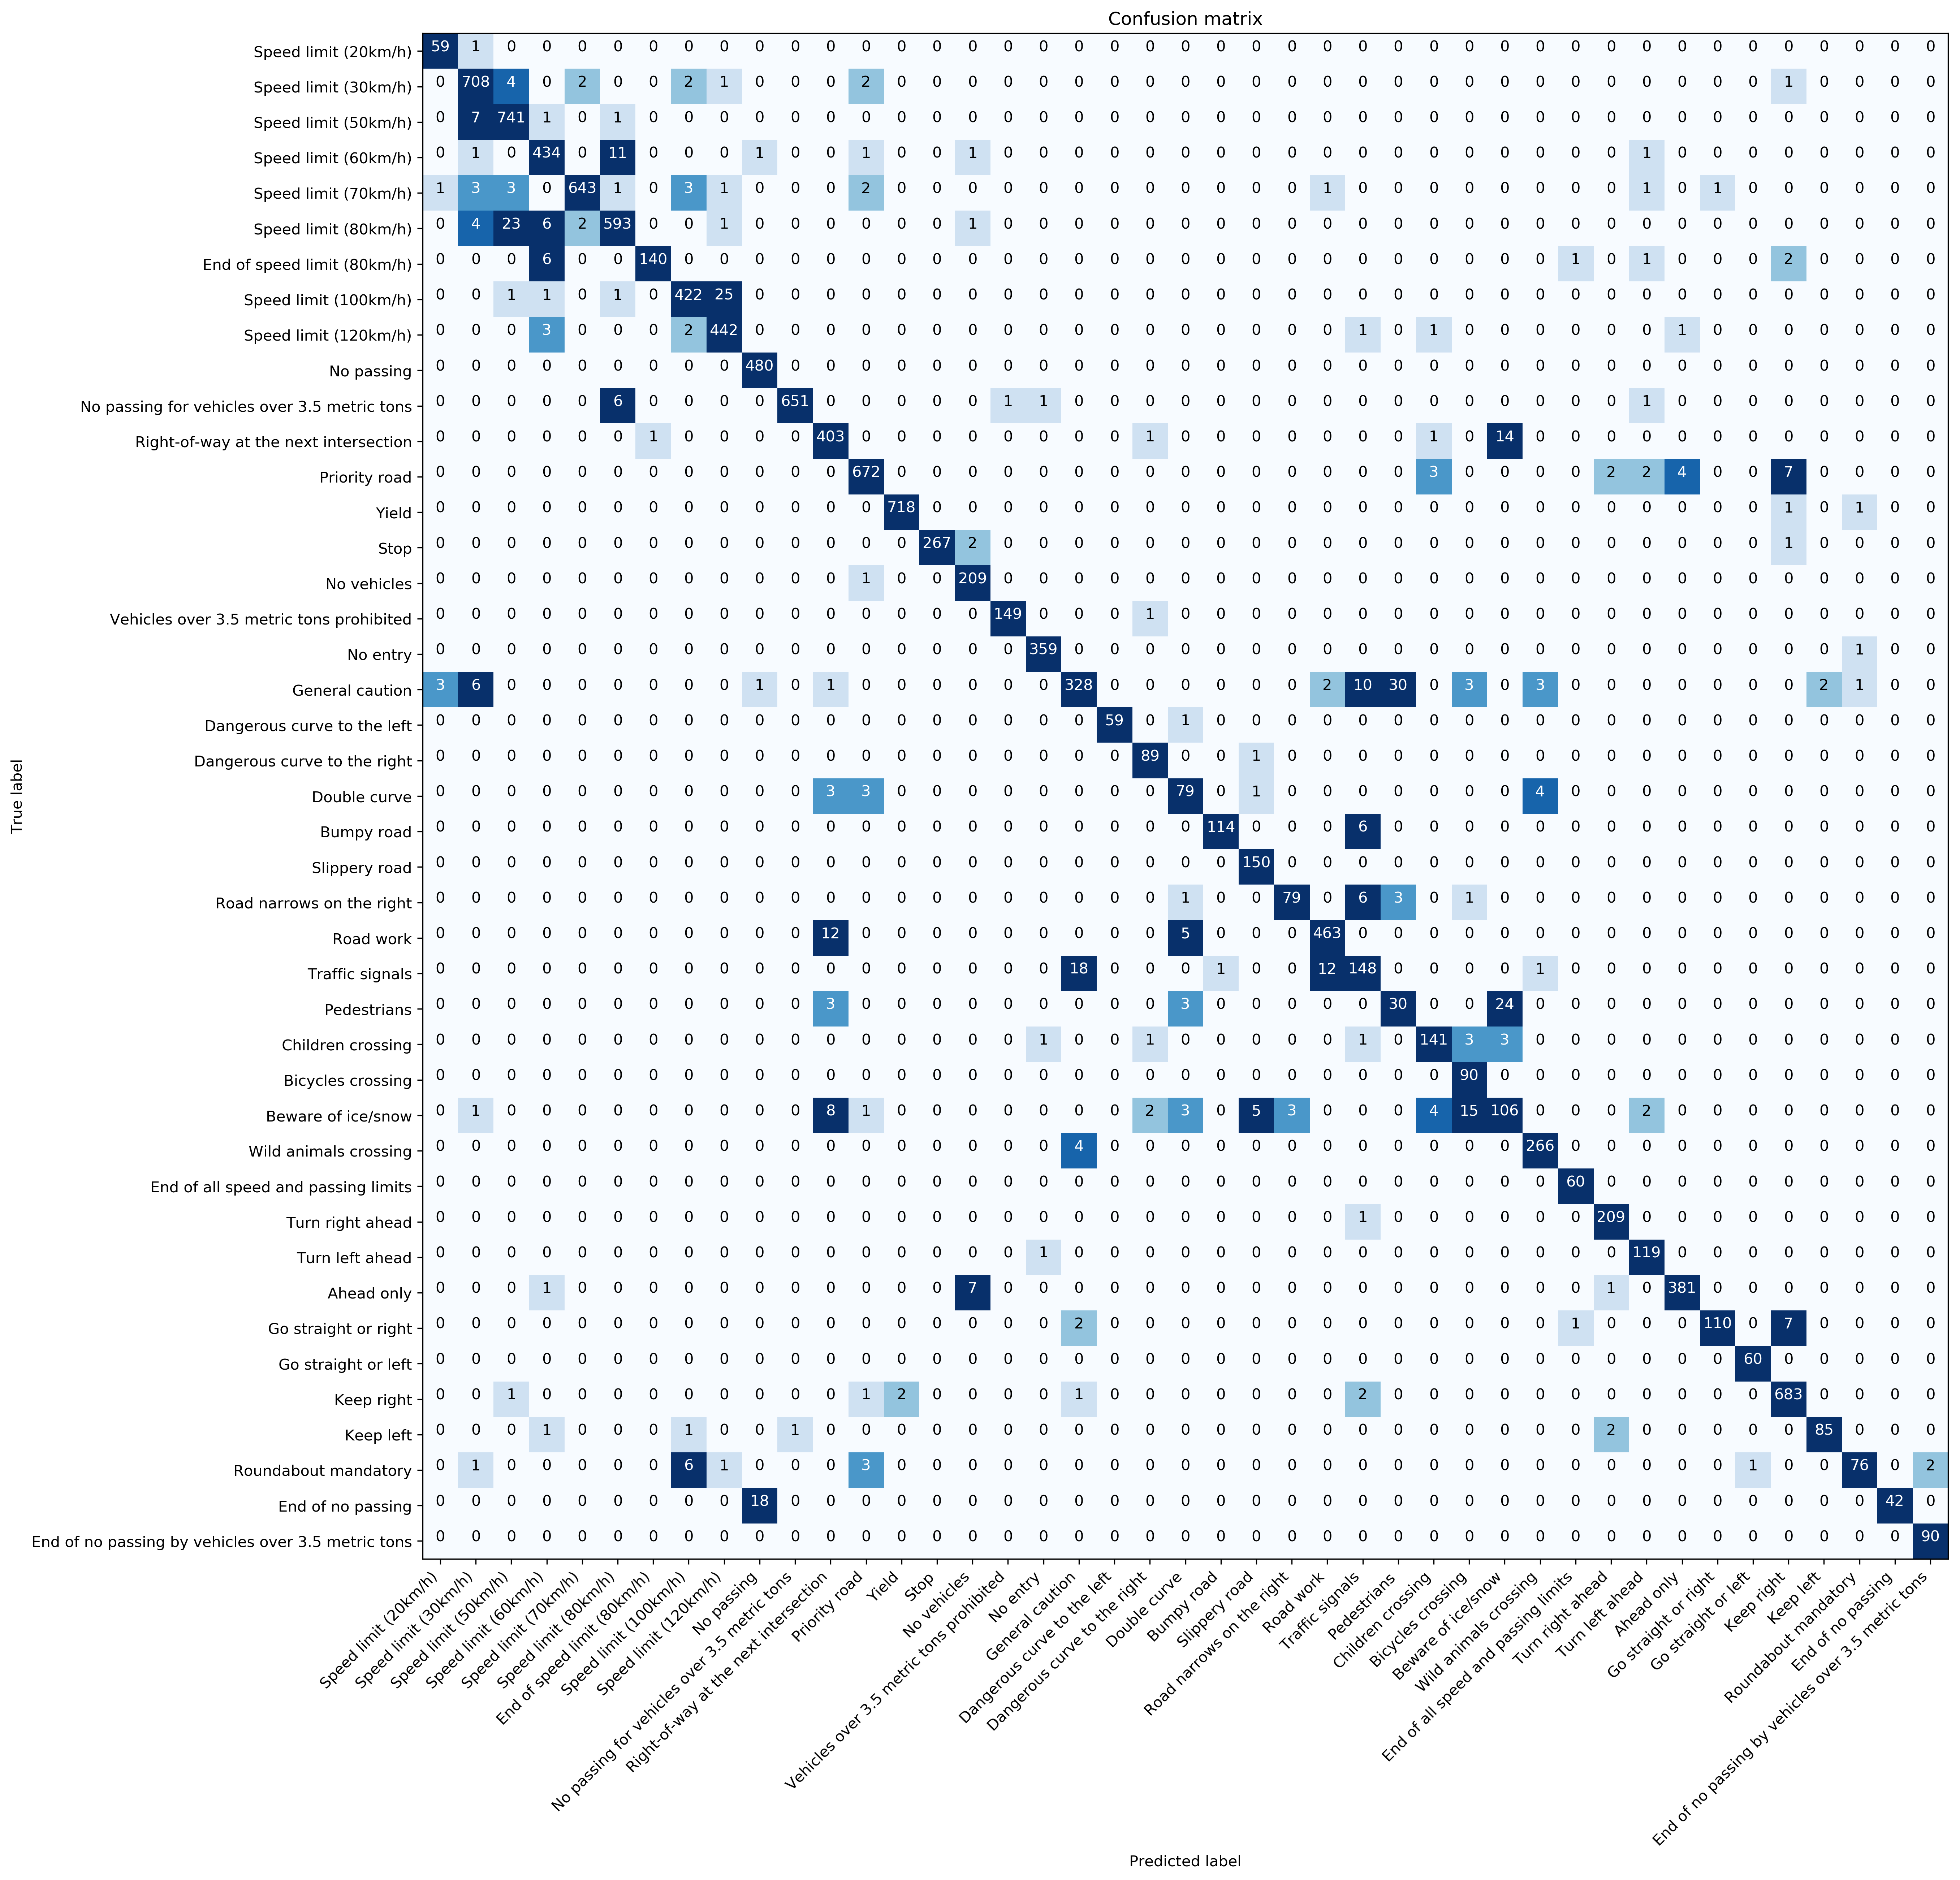

In [275]:
plot_confusion_matrix(confusion_matrix, sign_classes, title='Confusion matrix')


Speed limit (20km/h)


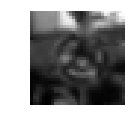


Speed limit (30km/h)


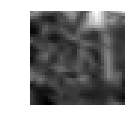


Speed limit (100km/h)


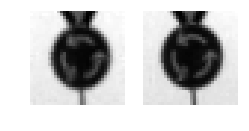


Priority road


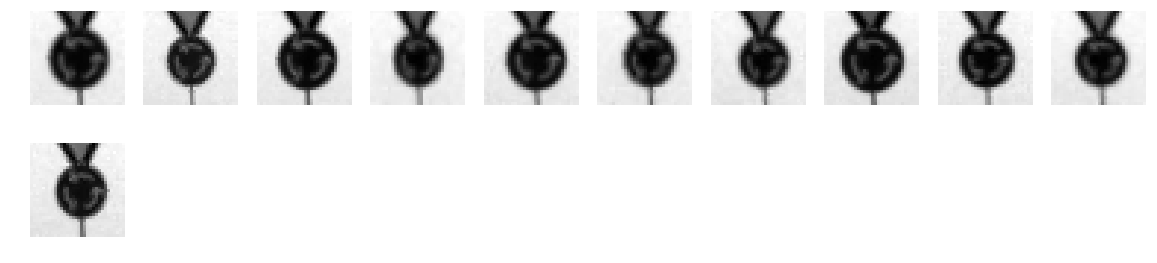


General caution


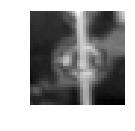


Traffic signals


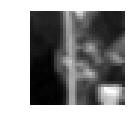

In [220]:
cur_label = 40

grouped_images = []
for i in range(n_classes):
    images_by_class = [image for index,image in enumerate(miscategorised_images[cur_label]) if matching_predictions[cur_label][index] == i]
    if len(images_by_class)>0:
        print('')
        print(sign_classes[i])
        print_images(images_by_class)

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [195]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

dir = './downloaded_signs'
files = os.listdir(dir)

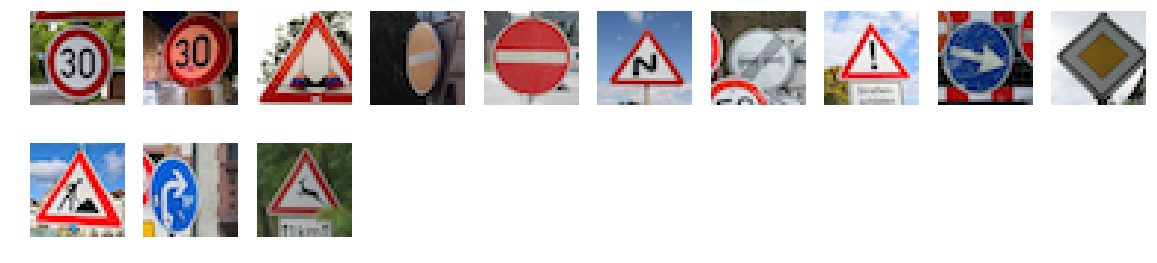

(13, 32, 32, 3)


In [225]:
image_files = [dir + '/' + file for file in files if '.png' in file]

def import_and_convert_RGB(image_file):
    image = cv2.imread(image_file, 3)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

custom_images = [import_and_convert_RGB(image_file) for image_file in image_files]
custom_images = np.array(custom_images)

print_images(custom_images)
print(custom_images.shape)

Add labels by hand.

In [95]:
custom_labels = [1, 1, 22, 17, 17, 21, 41, 18, 38, 12, 25, 33, 31]

### Predict the Sign Type for Each Image

Preproces the images as before:

In [197]:
tf_processed_custom = tf.map_fn(lambda x: tf.image.per_image_standardization(x), custom_images, dtype=tf.float32, parallel_iterations=2000)

if COLOR_CHANNELS is 1:
    tf_processed_custom = tf.image.rgb_to_grayscale(tf_processed_custom)
    
with tf.Session() as sess:
    processed_custom = tf_processed_custom.eval()
    

Run trained classifier:

In [242]:
#Run it on the test set.
with tf.Session() as sess:
    saver.restore(sess, './lenet')
    
    test_accuracy = sess.run(accuracy, feed_dict={x: processed_custom, y: custom_labels, dropout_keep: 1.0})
    print("")
    print("---------------------------")
    print("|  Test Accuracy = {:.3f}  |".format(test_accuracy))
    print("---------------------------")
    print("")

    y_pred = get_prediction(processed_custom)
    confusion_matrix = get_confusion_matrix(y_pred, custom_labels)
    
    miscategorised_images, matching_predictions = get_miscategorised_images(y_pred, processed_custom, custom_labels, n_classes)

INFO:tensorflow:Restoring parameters from ./lenet

---------------------------
|  Test Accuracy = 0.615  |
---------------------------



### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

Confusion matrix, without normalization


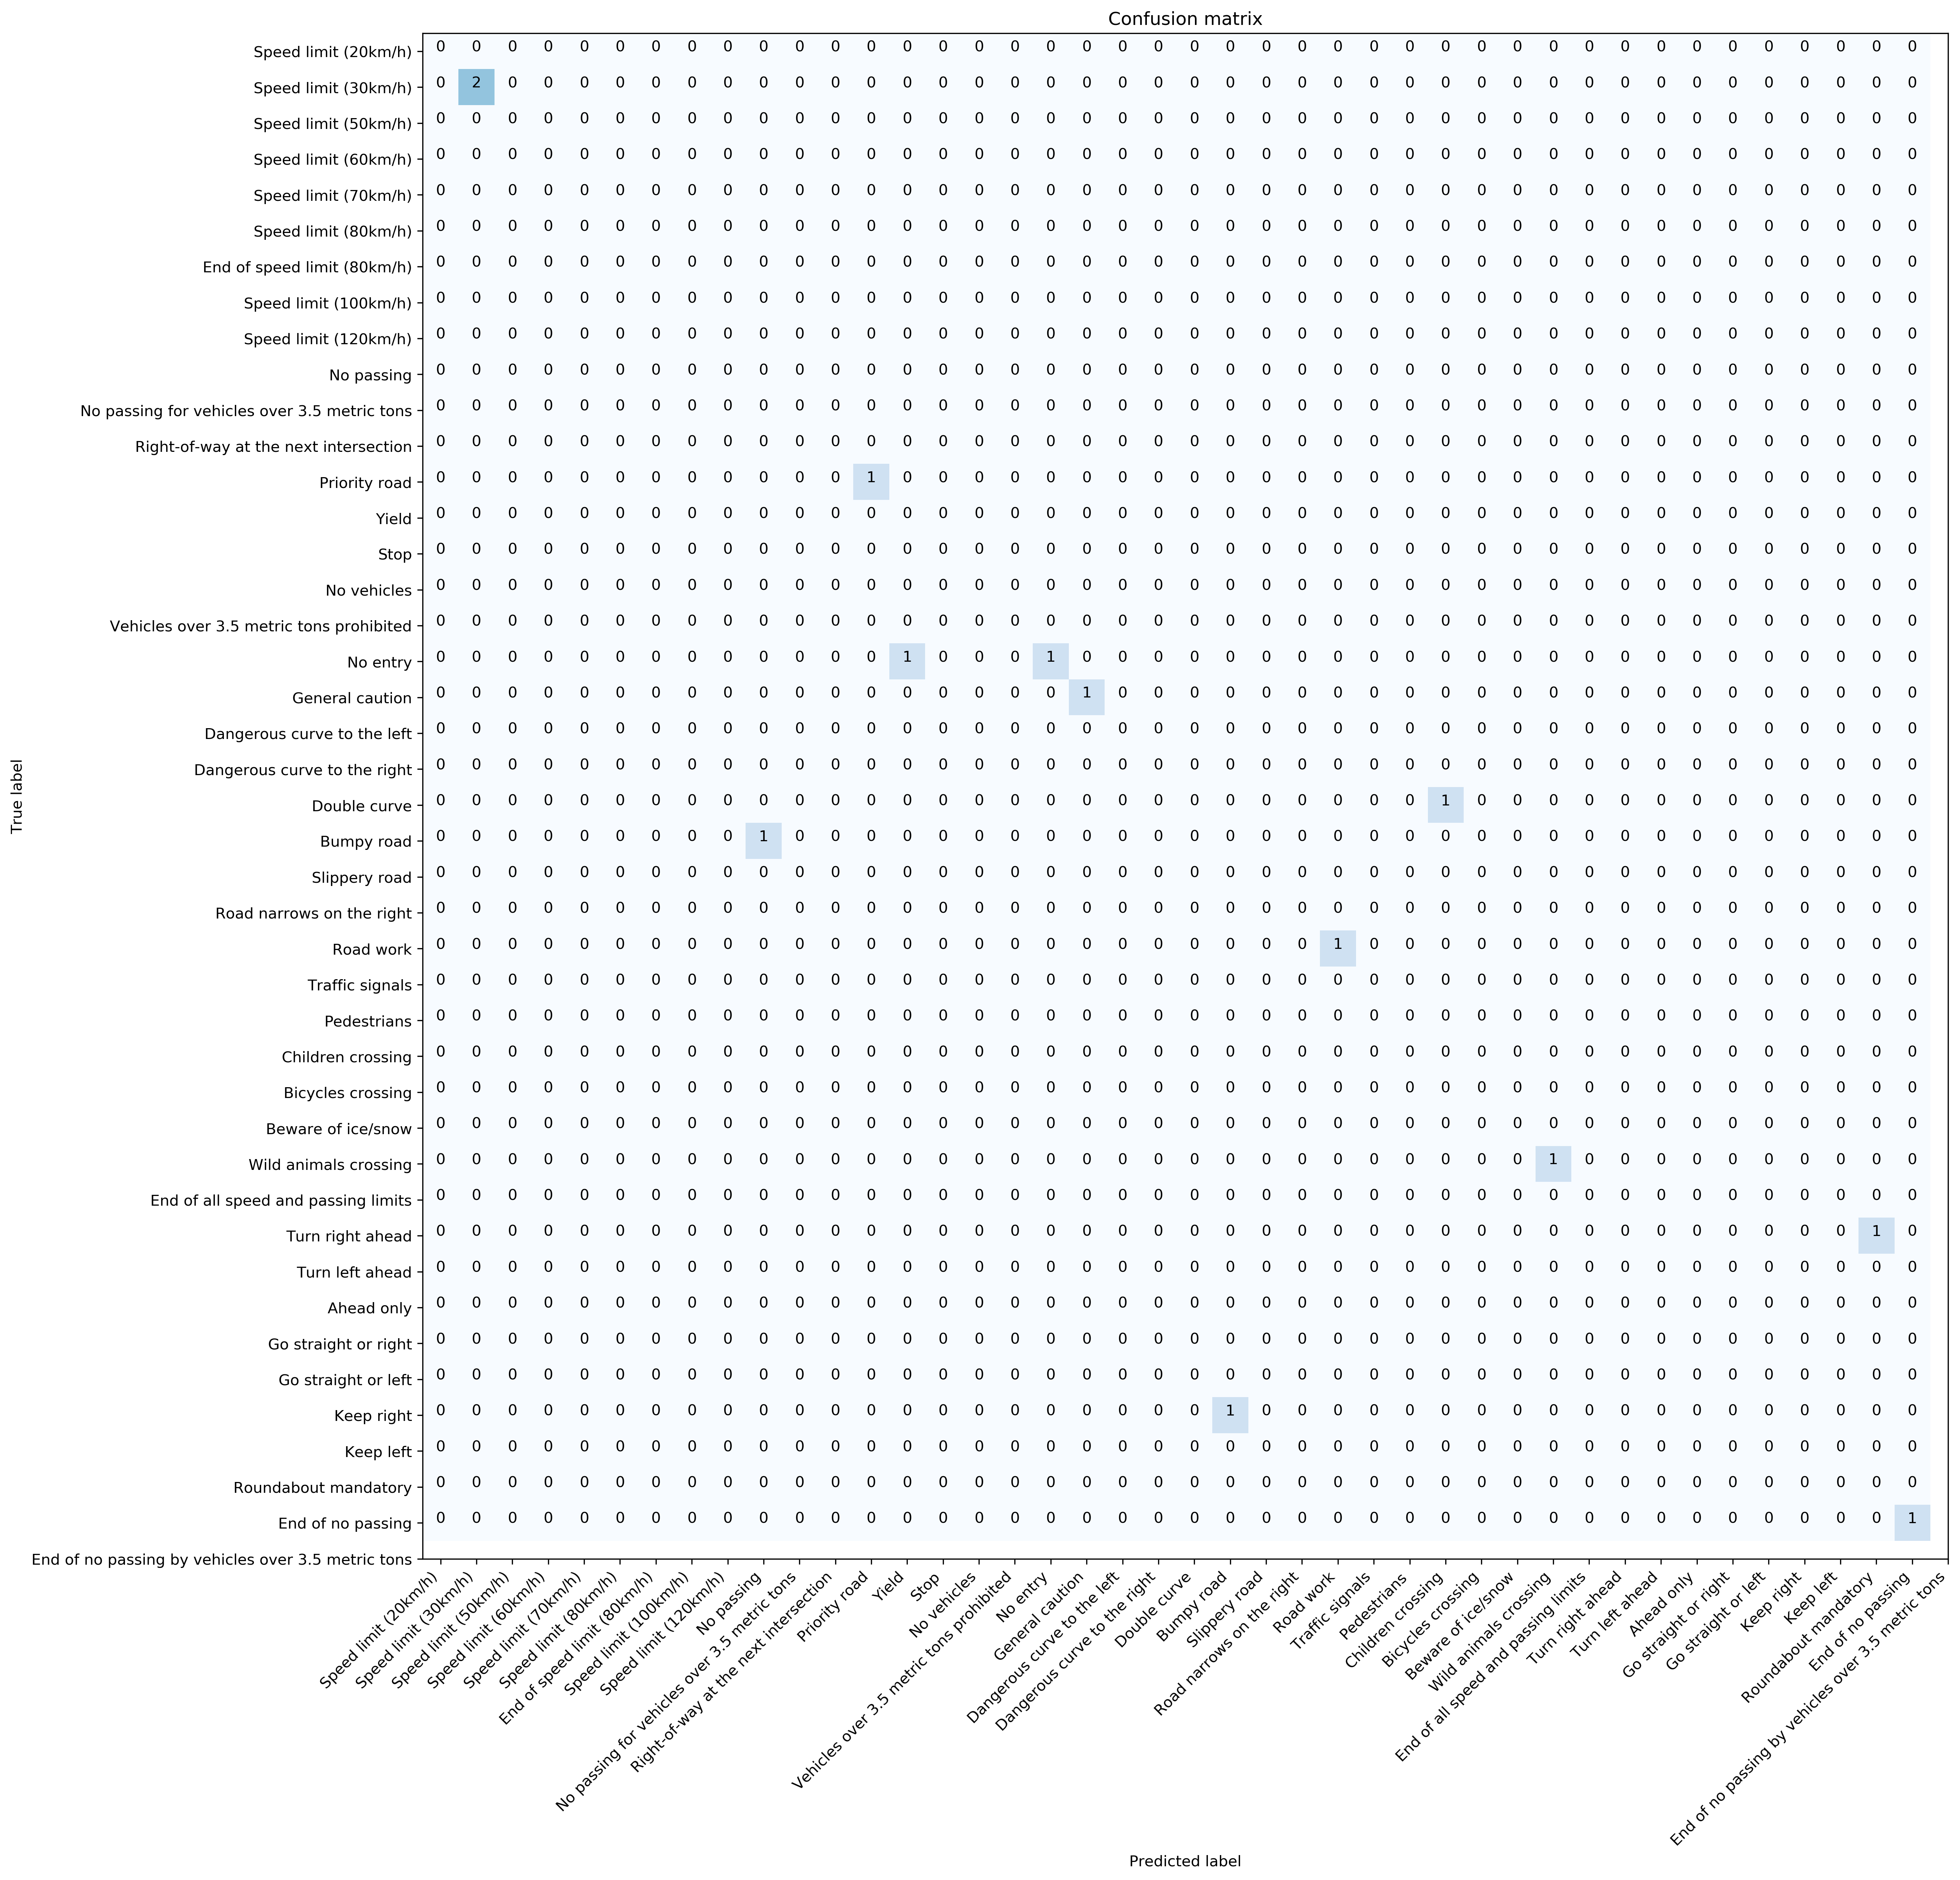

In [243]:
plot_confusion_matrix(confusion_matrix, sign_classes, title='Confusion matrix')

Print out images mistakenly classified and the predicted label:


Yield


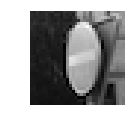


Children crossing


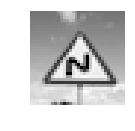


No passing


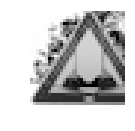


Roundabout mandatory


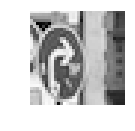


Bumpy road


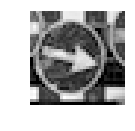

In [244]:
for j in range(len(miscategorised_images)):
    for i in range(n_classes):
        images_by_class = [image for index,image in enumerate(miscategorised_images[j]) if matching_predictions[j][index] == i]
        if len(images_by_class)>0:
            print('')
            print(sign_classes[i])
            print_images(images_by_class)

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [237]:
def horz_barchart(y_labels, values):
    y = np.arange(len(y_labels))
    plt.barh(y, values, alpha=0.5)
    plt.yticks(y, y_labels) #, ha="right"
    plt.show()

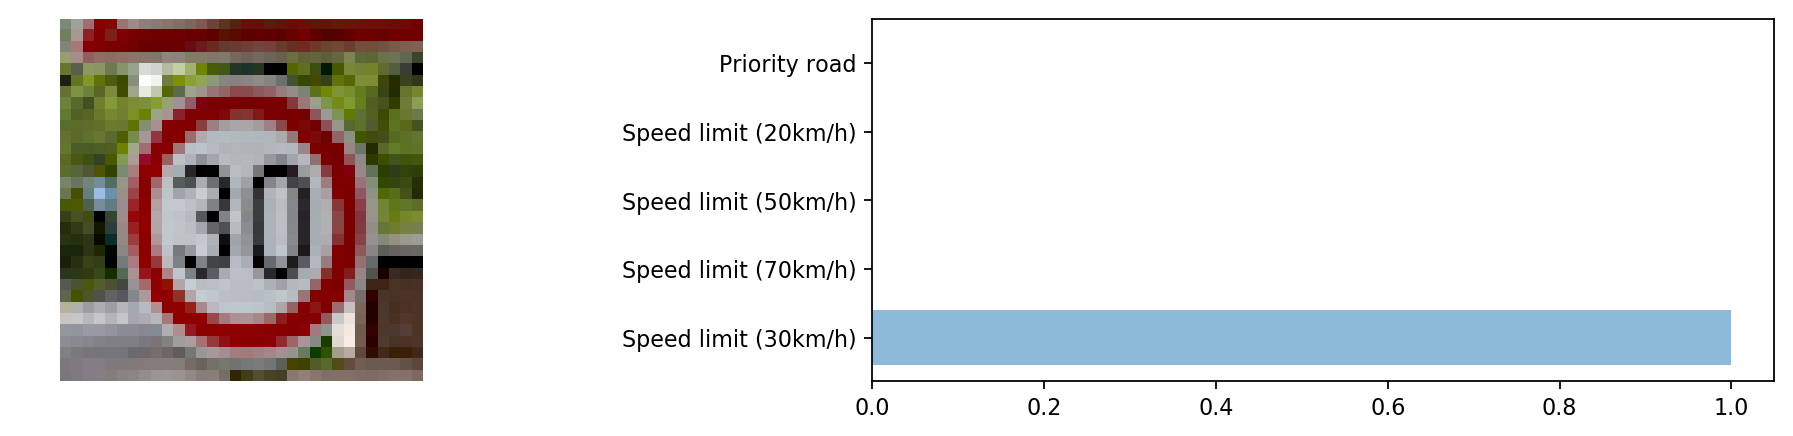

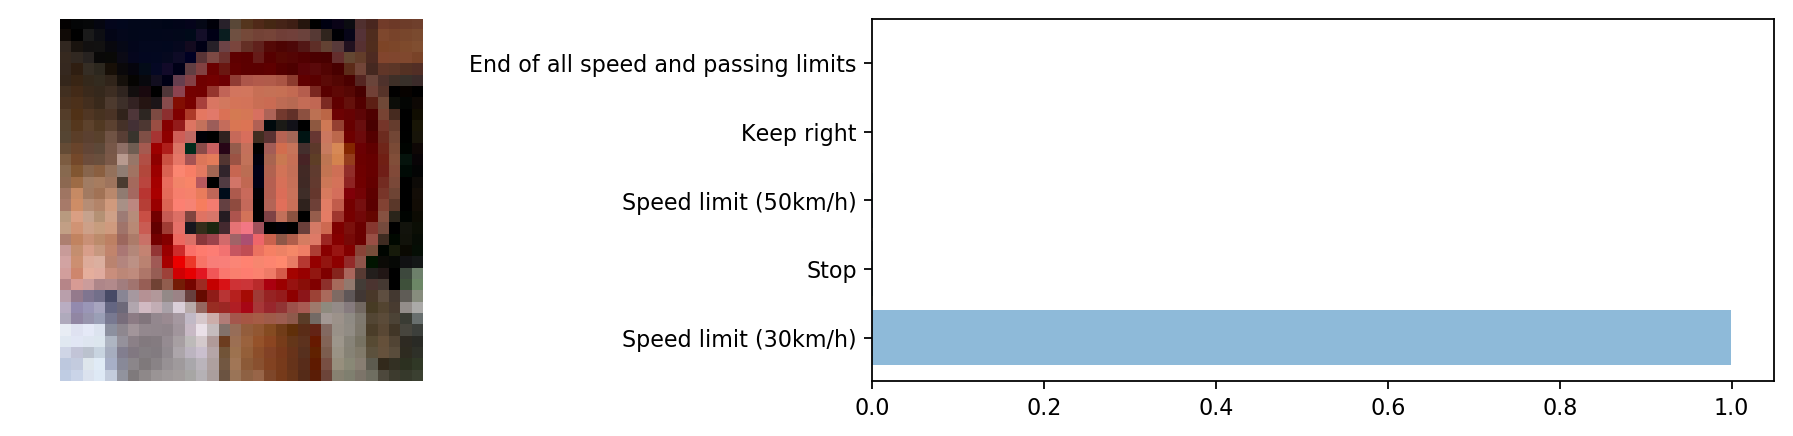

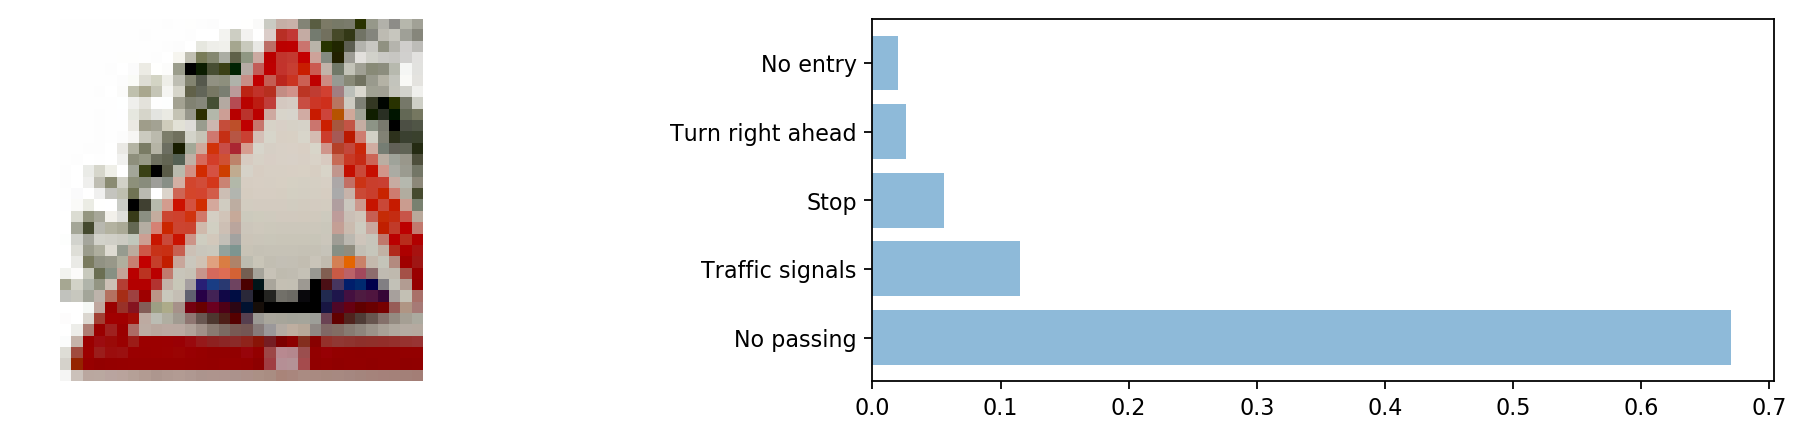

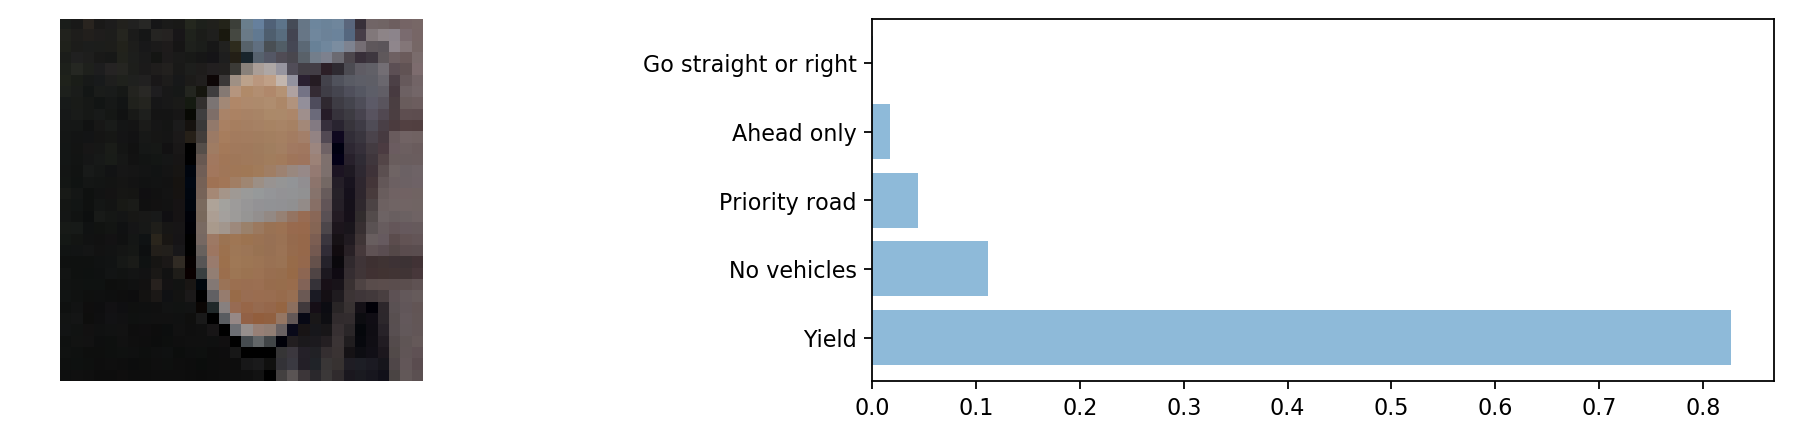

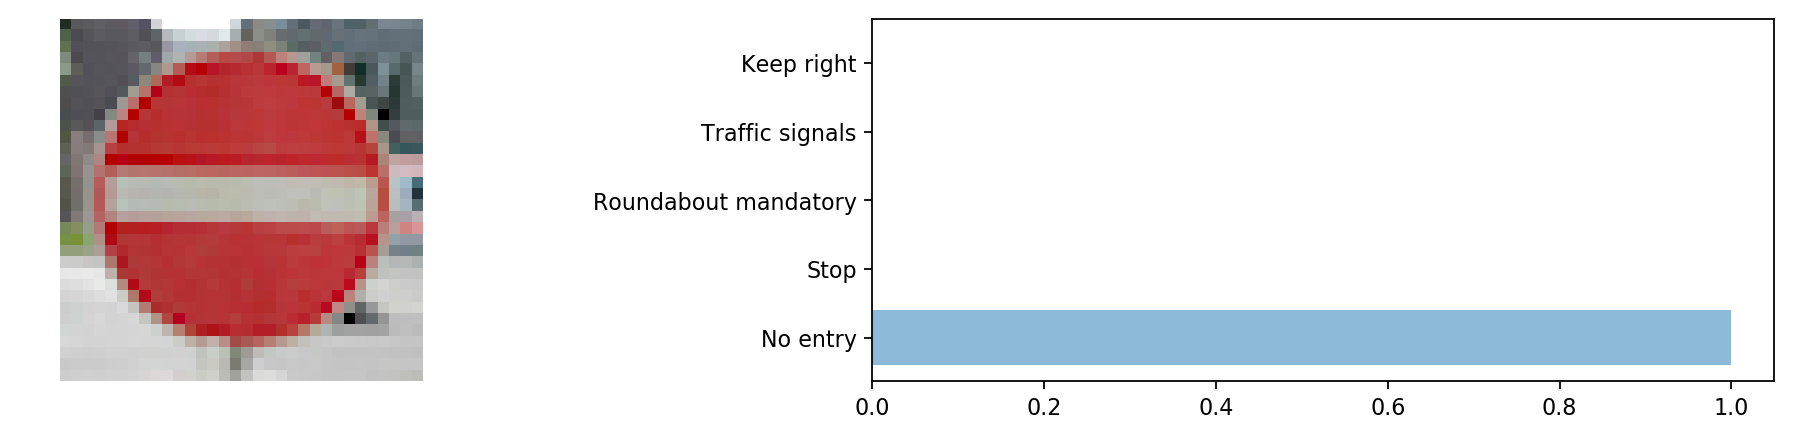

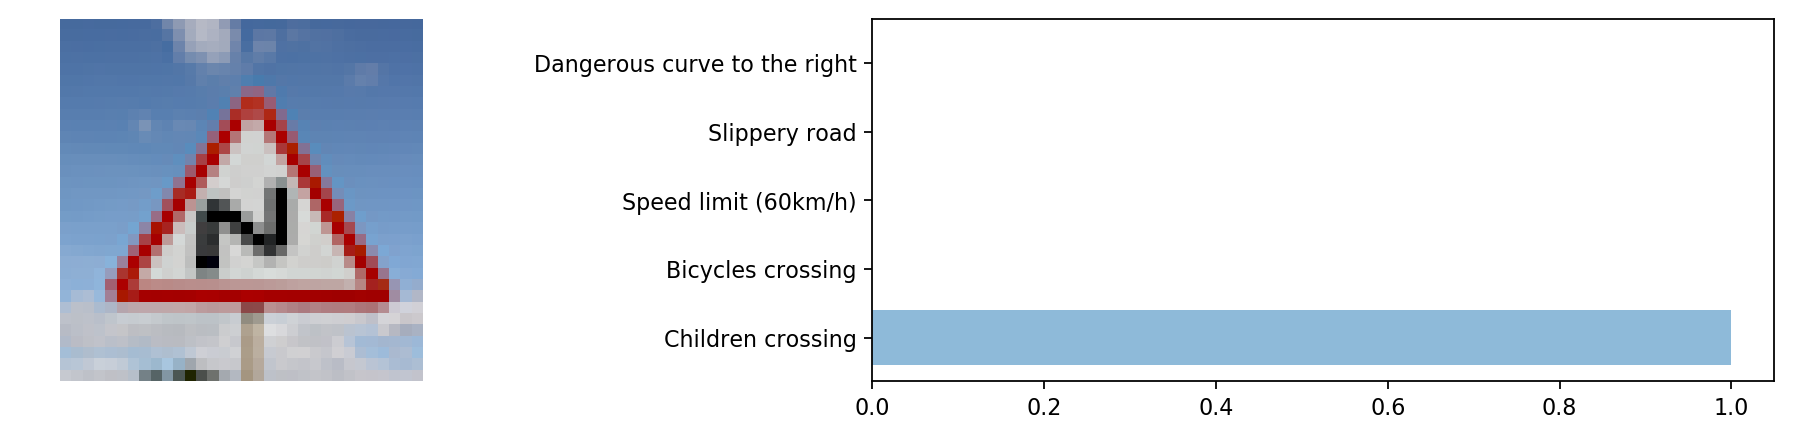

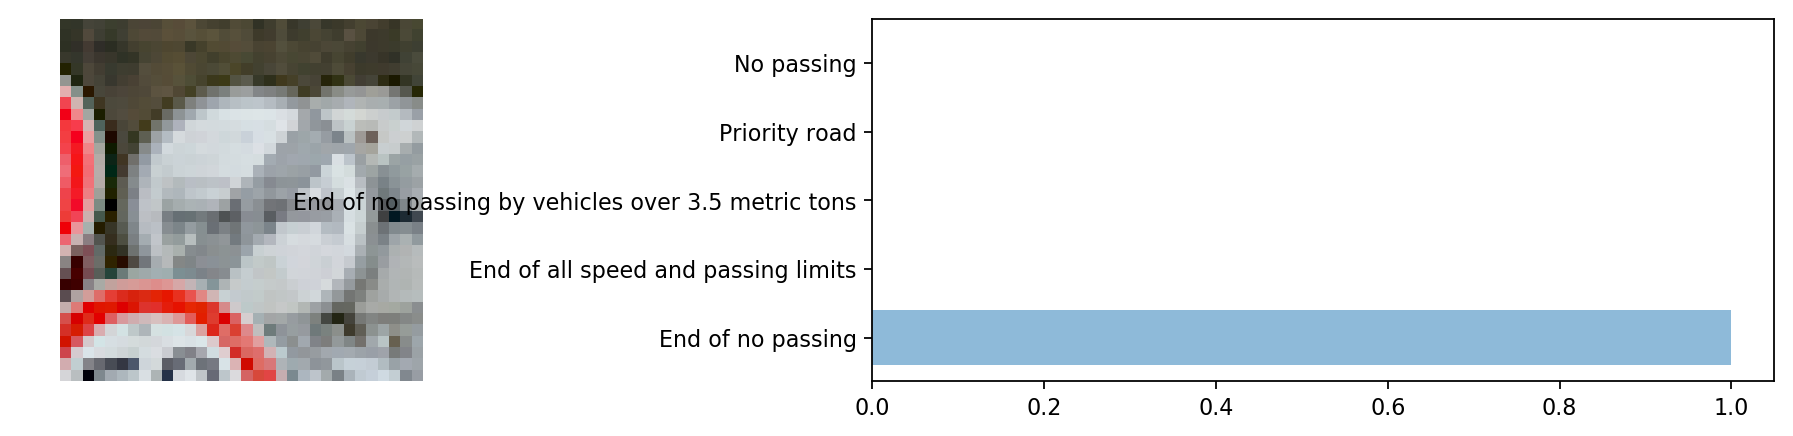

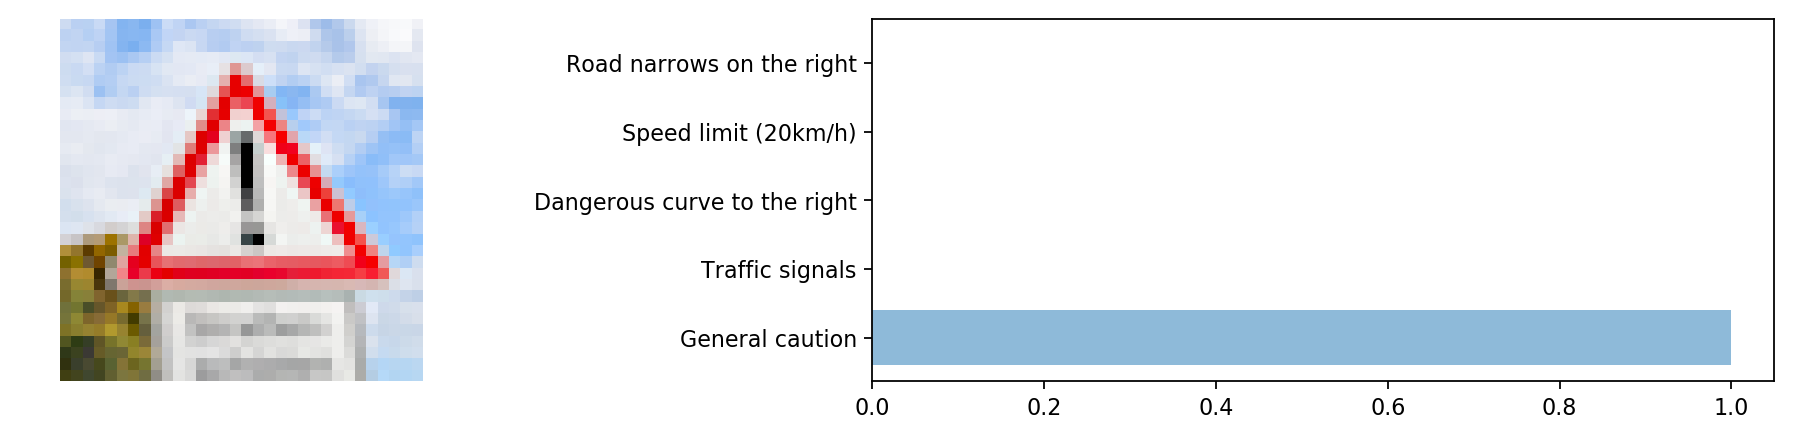

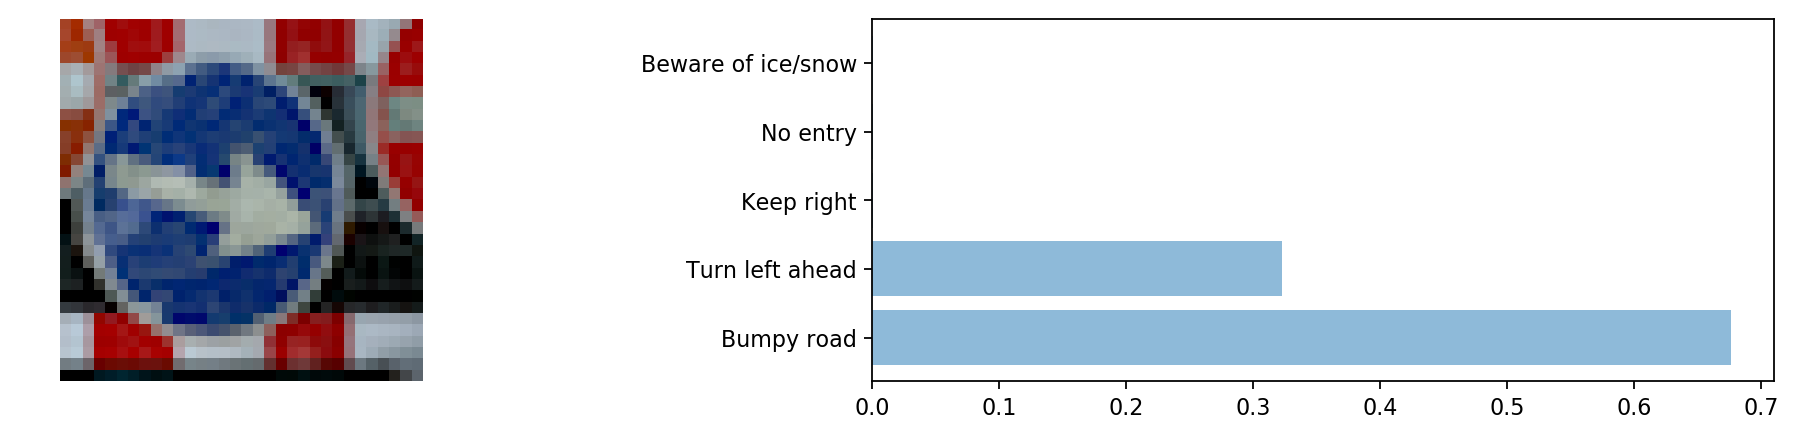

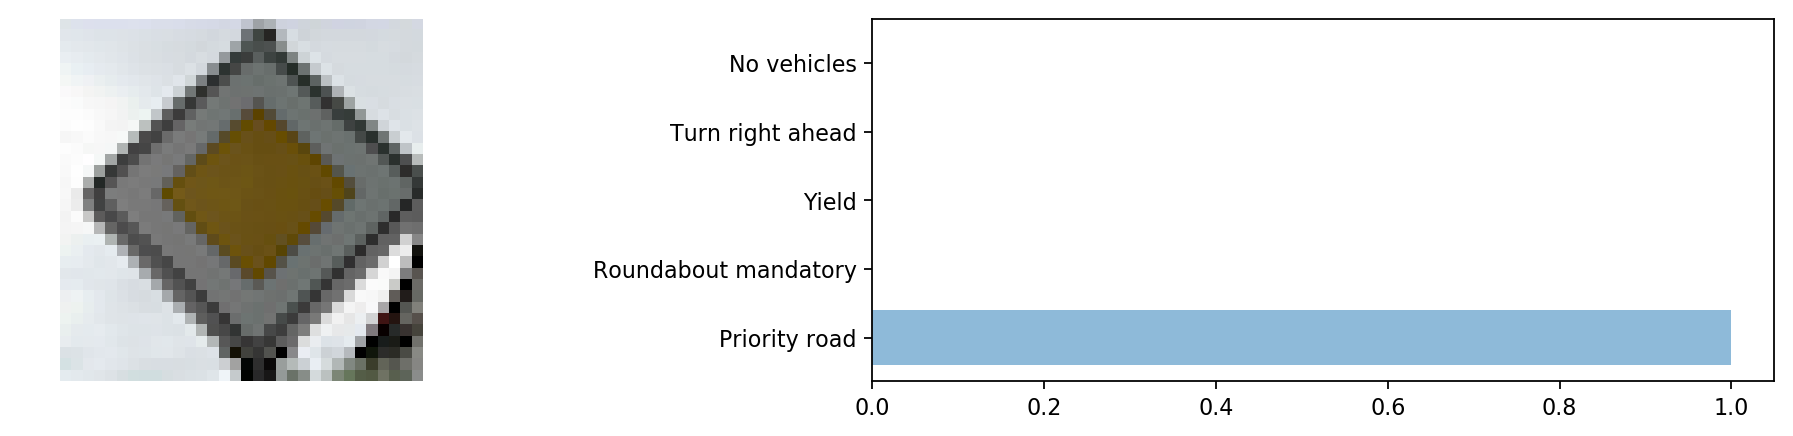

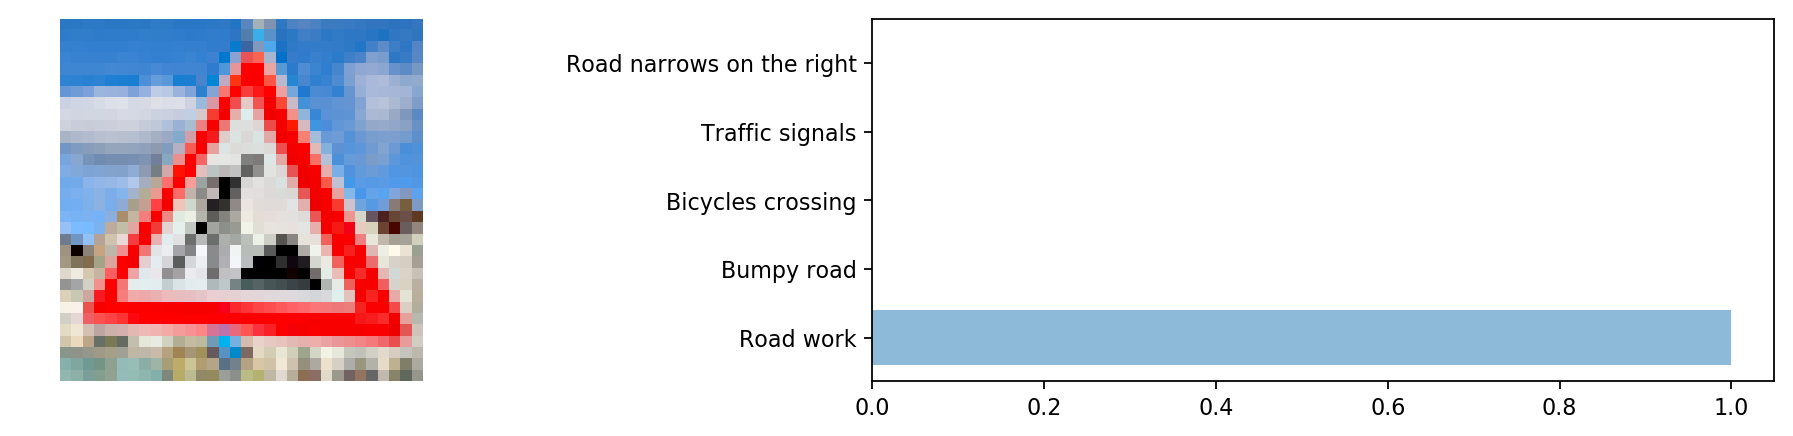

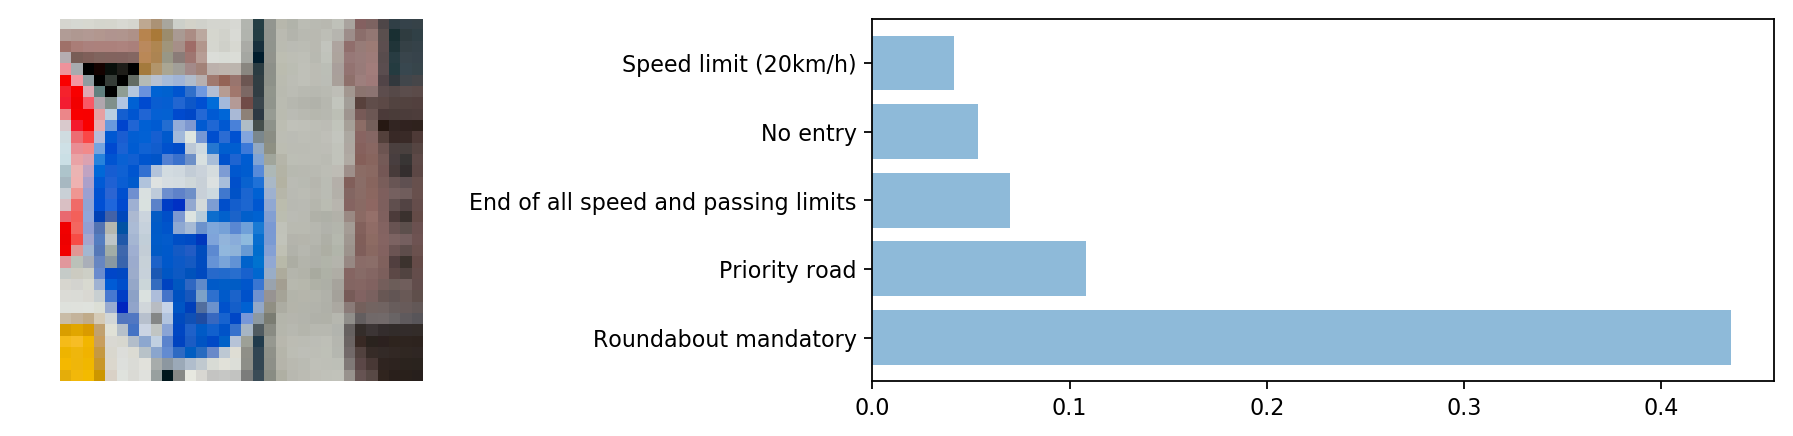

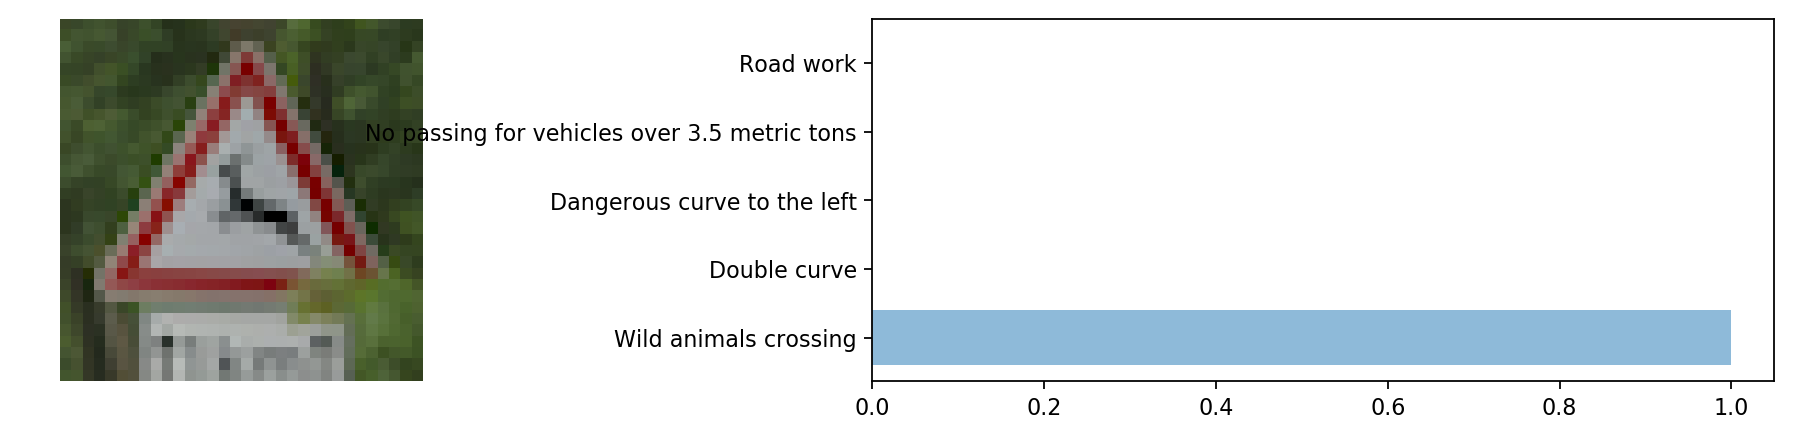

In [245]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    softmax_probabilities = sess.run(tf.nn.top_k(y_pred, k=5))

for i in range(len(custom_images)):
    fig=plt.figure(figsize=(16, 3), dpi= 160)
    plt.subplot(1, 2, 1)
    plot_image(custom_images[i])
    plt.subplot(1, 2, 2)
    sign_labels = [sign_classes[softmax_index] for softmax_index in softmax_probabilities.indices[i]]
    horz_barchart(sign_labels, softmax_probabilities.values[i])

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.